In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Libraries and Filesystem Setup

In [2]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse

### Import Doc2Vec document vectors

In [4]:
dv_matrix = np.load(open("../../processed_files/d2v_matrix.npy", "rb"), allow_pickle=True)
df_merged = pickle.load(open("../../processed_files/df_merged.pickle", "rb"))

In [5]:
print(dv_matrix.shape)
print(dv_matrix[0].shape)

(12968, 300)
(300,)


## doc2vec

In [6]:
from sklearn.preprocessing import normalize
dv_mat = normalize(dv_matrix, norm='l2', axis=1)

In [7]:
num_clusters = 20
algorithm = 'full'

In [8]:
%%time
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=0, algorithm=algorithm).fit(dv_mat)

CPU times: user 26.9 s, sys: 8.33 s, total: 35.3 s
Wall time: 5.06 s


In [9]:
kmeans.labels_

array([6, 6, 2, ..., 6, 2, 4], dtype=int32)

In [10]:
index_cluster = zip(range(len(kmeans.labels_)), kmeans.labels_)
index_cluster_dict = dict(index_cluster)
index_cluster_dict[456]

18

In [11]:
cluster_index = list(zip(kmeans.labels_, range(len(kmeans.labels_))))

In [12]:
cluster_list = dict()
for i in range(num_clusters):
    cluster_list[i] = list(filter(lambda row: row[0] == i, cluster_index))

In [13]:
cluster_list[0]

[(0, 9),
 (0, 11),
 (0, 12),
 (0, 64),
 (0, 107),
 (0, 112),
 (0, 131),
 (0, 200),
 (0, 203),
 (0, 210),
 (0, 214),
 (0, 238),
 (0, 246),
 (0, 269),
 (0, 340),
 (0, 367),
 (0, 388),
 (0, 411),
 (0, 415),
 (0, 417),
 (0, 470),
 (0, 521),
 (0, 523),
 (0, 554),
 (0, 587),
 (0, 629),
 (0, 675),
 (0, 780),
 (0, 838),
 (0, 959),
 (0, 983),
 (0, 1000),
 (0, 1045),
 (0, 1060),
 (0, 1061),
 (0, 1086),
 (0, 1114),
 (0, 1173),
 (0, 1217),
 (0, 1236),
 (0, 1287),
 (0, 1288),
 (0, 1290),
 (0, 1319),
 (0, 1371),
 (0, 1374),
 (0, 1383),
 (0, 1397),
 (0, 1406),
 (0, 1445),
 (0, 1449),
 (0, 1490),
 (0, 1531),
 (0, 1551),
 (0, 1582),
 (0, 1627),
 (0, 1676),
 (0, 1734),
 (0, 1752),
 (0, 1767),
 (0, 1791),
 (0, 1832),
 (0, 1889),
 (0, 1902),
 (0, 1911),
 (0, 1931),
 (0, 1942),
 (0, 1962),
 (0, 1973),
 (0, 1977),
 (0, 2005),
 (0, 2009),
 (0, 2013),
 (0, 2027),
 (0, 2055),
 (0, 2074),
 (0, 2084),
 (0, 2087),
 (0, 2099),
 (0, 2108),
 (0, 2122),
 (0, 2140),
 (0, 2166),
 (0, 2170),
 (0, 2174),
 (0, 2176),
 (0,

In [15]:
print(kmeans.labels_.shape)
print(kmeans.cluster_centers_.shape)

(12968,)
(20, 300)


In [17]:
import statistics

# index is cluster index
def intracluster_similarity(index):
    cluster_centroid = kmeans.cluster_centers_[index]
    dist_list = []
    cluster = cluster_list[index]
    for i in cluster:
        distance = np.linalg.norm(cluster_centroid-dv_matrix[i[1]])
        dist_list.append(distance)
        
    #avg = sum_dist/(len(indices[index])-1)
    avg = np.average(dist_list)

    #variance = statistics.variance(dist_list)
    variance = np.var(dist_list)
    
    return avg, variance

In [18]:
intracluster_similarity(19)

(8.619579, 11.784903)

In [19]:
# index is cluster / cluster id
def generate_raw_content_cluster_df(index):
    index_list = cluster_list[index]
    index_list = [x[1] for x in index_list]
    cluster_seed = df_merged.loc[index].to_frame().T
    #cluster_df = df_merged.loc[index_list[1:]]
    cluster_df = df_merged.loc[index_list[1:]]
    combined = pd.concat([cluster_seed, cluster_df])
    combined['cluster'] = index
    return combined

In [20]:
generate_raw_content_cluster_df(1)

,DOMAIN,RAW_CONTENT,RAW_CONTENT_PROCESSED,RAW_CONTENT_PROCESSED_STEMMED,cluster
1,00bitz.com,error. page cannot be displayed. please contac...,"[error, page, cannot, displayed, please, conta...","[e, r, r, o, r, ., , p, a, g, e, , c, a, n, ...",1
67,1xbetmirrors.online,fortnite ps4 free accounts fortnite ps4 freund...,"[fortnite, ps, free, accounts, fortnite, ps, f...","[f, o, r, t, n, i, t, e, , p, s, 4, , f, r, ...",1
75,247sports.com,2020 football recruits follow omspirit.com 202...,"[football, recruits, follow, omspiritcom, foot...","[2, 0, 2, 0, , f, o, o, t, b, a, l, l, , r, ...",1
79,24hnews.info,24hnews.info 24hnews.info 2020 copyright. all ...,"[hnewsinfo, hnewsinfo, copyright, sponsored, l...","[2, 4, h, n, e, w, s, ., i, n, f, o, , 2, 4, ...",1
170,94717.us,zipcode.us × find a .us domain there are many ...,"[zipcodeus, ×, find, us, domare, many, registr...","[z, i, p, c, o, d, e, ., u, s, , ×, , f, i, ...",1
172,97235.com.cn,双辽市信达园林绿化服务有限公司-首页 97235.com.cn the domain is ...,"[双辽市信达园林绿化服务有限公司首页, comcn, domain, sale！, leim...","[双, 辽, 市, 信, 达, 园, 林, 绿, 化, 服, 务, 有, 限, 公, 司, ...",1
196,abacoop.org,abacoop.org,[abacooporg],"[a, b, a, c, o, o, p, ., o, r, g]",1
198,abbeycoseattle.blog,what to do with only 4 hours to tourist in was...,"[hours, tourist, washington, dc, –, abbey, co,...","[w, h, a, t, , t, o, , d, o, , w, i, t, h, ...",1
199,abbisecraa.org,captcha powered by imunify360 english abbisecr...,"[captcha, powered, imunify, english, abbisecra...","[c, a, p, t, c, h, a, , p, o, w, e, r, e, d, ...",1
227,acaibowl.co.uk,want your own website? | 123 reg,"[want, website, reg]","[w, a, n, t, , y, o, u, r, , o, w, n, , w, ...",1


In [21]:
avg_list = []
variance_list = []

for i in range(num_clusters):
    avg, variance = intracluster_similarity(i)
    avg_list.append(avg)
    variance_list.append(variance)
    #print()

([<matplotlib.axis.XTick at 0x1b8f86d5c0>,
 <a list of 7 Text xticklabel objects>)

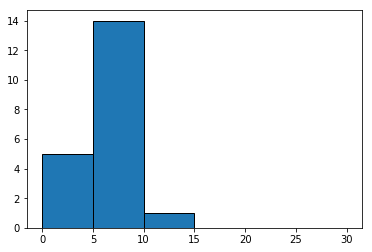

In [22]:
# number of clusters = 20
bins= [0,5,10,15,20,25,30]
plt.hist(avg_list, bins=bins, edgecolor="k")
plt.xticks(bins)

In [23]:
print(len(avg_list), len(variance_list))

20 20


## Intercluster Similarity

In [24]:
def intercluster_dist():
    indices = range(len(kmeans.cluster_centers_))
    centroid_centroid_distance = {}
    values = []
    for i in indices:
        for j in indices:
            if i < j:
                key = str(i) + "::" + str(j)
                distance = np.linalg.norm(kmeans.cluster_centers_[i] - kmeans.cluster_centers_[j])
                centroid_centroid_distance[key] = distance
                values.append(distance)
    return centroid_centroid_distance, values

## number of clusters = 20

In [25]:
intercluster_distances, values = intercluster_dist()
#print('distances', values)
print('average', np.average(values))

average 0.52122104
